In [1]:
import gym
from gym_minigrid.minigrid import Grid
from gym_minigrid.wrappers import FullyObsWrapper, ReseedWrapper, RGBImgObsWrapper
from PIL import Image

### Atari Test

In [2]:
from rlpyt.envs.atari.atari_env import AtariEnv

In [3]:
atari_env = AtariEnv()

In [4]:
obs = atari_env.reset()

In [6]:
obs.shape

(4, 104, 80)

In [9]:
env_id = 'MiniGrid-FourRooms-v0'
env = ReseedWrapper(gym.make(id=env_id))

In [10]:
compact_env = FullyObsWrapper(env)
reset = compact_env.reset()
# compact_arr = compact_env.step(compact_env.action_space.sample())[0]
# compact_img = Image.fromarray(compact_arr, 'RGB')
# compact_img.show()

In [12]:
compact_env.unwrapped.agent_pos

array([12,  6])

In [16]:
reset.mean()

0.9104339796860572

In [25]:
for r, row in enumerate(compact_arr):
    for c, point in enumerate(row):
        if point[0] == 10:
            print(r, c)

12 6


In [ ]:
compact_env.reset()
for i in range(1000):
    compact_env.render()
    compact_env.step(2)
    if i % 50 == 0: 
        compact_env.step(1)
        compact_env.step(1)
compact_env.close()

In [ ]:
compact_env.reset()
for _ in range(1000):
    compact_env.render()
    compact_env.step(compact_env.action_space.sample())
compact_env.close()

In [ ]:
compact_env = FullyObsWrapper(env)
compact_env.reset()
for _ in range(1000):
    compact_env.render()
    compact_env.step(3)
compact_env.close()

In [7]:
full_env = RGBImgObsWrapper(env)
reset = full_env.reset()

In [8]:
reset.shape

(152, 152, 3)

In [13]:
full_env.unwrapped.agent_pos

array([12,  6])

In [17]:
full_env.step(1)
full_env.unwrapped.agent_pos

array([12,  6])

In [26]:
full_env.step(2)
full_env.unwrapped.agent_pos

array([17,  6])

In [11]:
obs = full_env.step(full_env.action_space.sample())

In [16]:
full_arr = full_env.step(full_env.action_space.sample())[0]
full_img = Image.fromarray(full_arr, 'RGB')
full_img.show()

In [ ]:
full_env.reset()
for _ in range(1000):
    full_env.render()
    full_env.step(full_env.action_space.sample())
full_env.close()

In [3]:
import numpy as np

In [5]:
moves = np.random.randint(0, 3, int(1e6))

In [111]:
import matplotlib.pylab as plt
import numpy as np
import pickle
import seaborn as sns
import torch

In [112]:
with open('../experiments/successor.pkl', 'rb') as handle:
    SR = pickle.load(handle)

In [113]:
starting_pos = (12, 6)
starting_sr = SR[starting_pos]

In [114]:
grid = np.zeros((19, 19))

In [115]:
for i in range(19):
    for j in range(19):
        val = -1e-3
        pos = (i, j)
        if pos in SR:
            val = torch.norm(SR[pos] - starting_sr, 2)
        grid[i, j] = val

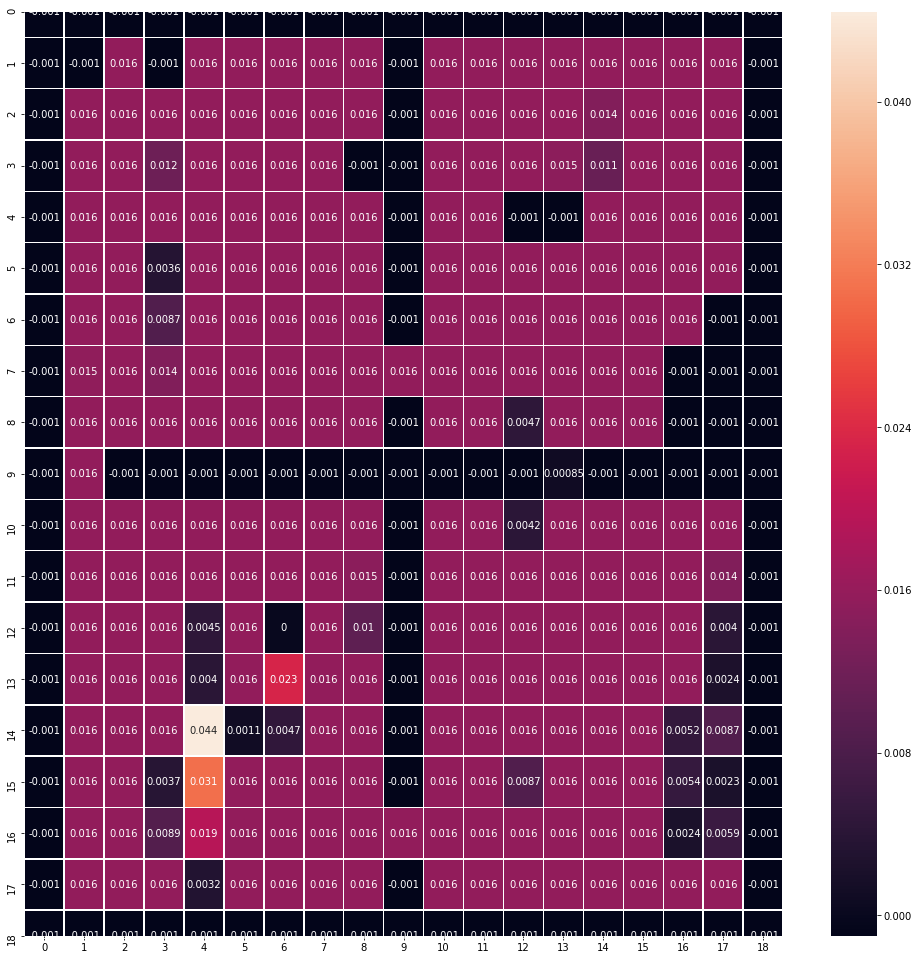

In [116]:
f, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(grid, annot=True, linewidth=0.5)

In [1]:
params = torch.load('../experiments/20191024-run2.pkl', map_location=torch.device('cpu'))

NameError: name 'torch' is not defined

In [35]:
from rlpyt.models.dqn.grid_dsr_model import GridDsrModel

In [86]:
full_env = RGBImgObsWrapper(gym.make(id=env_id))

In [39]:
model = GridDsrModel(env.observation_space.shape, env.action_space.n)
model.load_state_dict(params['agent_state_dict']['model'])

<All keys matched successfully>

In [93]:
obs = full_env.reset()

In [94]:
full_img = Image.fromarray(obs, 'RGB')
full_img.show()

In [96]:
obs = torch.Tensor(obs).unsqueeze(0)

In [97]:
reconstruct = model(obs, mode='reconstruct').squeeze(0)

In [98]:
reconstructed = reconstruct.data.numpy()

In [50]:
reconstruct_img = Image.fromarray(reconstruct.data.numpy(), 'RGB')
reconstruct_img.show()

In [71]:
reconstruct.std(dim=[0, 1])

tensor([0.7430, 0.7433, 0.7432], grad_fn=<StdBackward1>)

In [89]:
obs = obs.squeeze(0)

In [90]:
obs_normed = (obs - obs.mean(dim=[0, 1])) / obs.std(dim=[0, 1])

In [109]:
obs_normed.argmax(dim=0)

tensor([[151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [ 68, 151, 151],
        [ 68, 151, 151],
        [ 68, 151, 151],
        [ 69, 151, 151],
        [ 69, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],


In [99]:
((obs_normed - reconstruct))

tensor([[[ 2.1803,  2.1267,  2.1983],
         [ 2.1798,  2.1268,  2.1975],
         [ 2.1787,  2.1252,  2.1950],
         ...,
         [ 2.2110,  2.1569,  2.2263],
         [ 2.2119,  2.1584,  2.2271],
         [ 2.2125,  2.1583,  2.2274]],

        [[ 2.1825,  2.1266,  2.1985],
         [ 2.1825,  2.1275,  2.1983],
         [ 2.1824,  2.1293,  2.1984],
         ...,
         [ 2.2077,  2.1539,  2.2239],
         [ 2.2082,  2.1549,  2.2249],
         [ 2.2084,  2.1548,  2.2247]],

        [[ 2.1805,  2.1271,  2.1957],
         [ 2.1808,  2.1269,  2.1962],
         [ 2.1807,  2.1272,  2.1963],
         ...,
         [ 2.2095,  2.1560,  2.2258],
         [ 2.2097,  2.1562,  2.2258],
         [ 2.2097,  2.1560,  2.2258]],

        ...,

        [[-0.1496, -0.2038, -0.1243],
         [-0.1486, -0.1999, -0.1280],
         [-0.1404, -0.1947, -0.1252],
         ...,
         [-0.1241, -0.1873, -0.1158],
         [-0.1293, -0.1812, -0.1132],
         [-0.1284, -0.1815, -0.1120]],

        [[

In [85]:
for _ in range(1):
    test_env = RGBImgObsWrapper(ReseedWrapper(gym.make(id=env_id)))
    full_img = Image.fromarray(test_env.reset(), 'RGB')
    full_img.show()

In [17]:
np.linspace(0, 1, num=19)

array([0.        , 0.05555556, 0.11111111, 0.16666667, 0.22222222,
       0.27777778, 0.33333333, 0.38888889, 0.44444444, 0.5       ,
       0.55555556, 0.61111111, 0.66666667, 0.72222222, 0.77777778,
       0.83333333, 0.88888889, 0.94444444, 1.        ])

In [1]:
import numpy as np

In [7]:
num_features=64
sigma=1
cov = [[sigma, 0], [0, sigma]]

In [8]:
feature_map = np.array([[np.random.multivariate_normal([x, y], cov, num_features // 2).flatten() for x in range(19)] for y in range(19)])

In [14]:
(0, 0)

(0, 0)

In [21]:
np.random.multivariate_normal([0, 0], [[0.1, 0], [0, 0.1]], (32)).flatten()

array([ 0.13443533, -0.00636564,  0.54120367, -0.17107303,  0.02080377,
       -0.28195859, -0.45521075,  0.14659174, -0.03814311, -0.71472845,
        0.26676686, -0.0252475 , -0.41190121,  0.0208478 , -0.11426382,
        0.013379  , -0.27894162,  0.44052262,  0.02718706,  0.35921573,
       -0.05074346,  0.14785627, -0.29502873,  0.14755739,  0.07671952,
       -0.08156355,  0.06521696,  0.36716145,  0.24731715, -0.3111925 ,
       -0.32158845, -0.38290488,  0.07035463,  0.11277564,  0.26703662,
       -0.09475703, -0.16008462, -0.21965077,  0.23780558,  0.80629118,
       -0.10865316, -0.26225906,  0.48199718,  0.18862681, -0.2928876 ,
       -0.15651988, -0.14941064,  0.10817175, -0.05831149, -0.1157485 ,
       -0.19859643, -0.3269293 , -0.35576106, -0.33032545,  0.01756923,
        0.24267672,  0.15925464, -0.07000418,  0.3999283 , -0.58917843,
        0.09431885,  0.14660414,  0.1532269 ,  0.72881797])